<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#caracteristiques-table" data-toc-modified-id="caracteristiques-table-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>caracteristiques table</a></span><ul class="toc-item"><li><span><a href="#departement-code-correction" data-toc-modified-id="departement-code-correction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>departement code correction</a></span></li><li><span><a href="#year-correction" data-toc-modified-id="year-correction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>year correction</a></span></li><li><span><a href="#hrmn" data-toc-modified-id="hrmn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>hrmn</a></span></li><li><span><a href="#create-column-day-of-the-week" data-toc-modified-id="create-column-day-of-the-week-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>create column day of the week</a></span></li><li><span><a href="#lat-and-long-format" data-toc-modified-id="lat-and-long-format-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>lat and long format</a></span></li><li><span><a href="#import-csv-with-clean-table" data-toc-modified-id="import-csv-with-clean-table-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>import csv with clean table</a></span></li></ul></li><li><span><a href="#lieux-table" data-toc-modified-id="lieux-table-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>lieux table</a></span></li><li><span><a href="#Map-of-accidents" data-toc-modified-id="Map-of-accidents-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Map of accidents</a></span></li></ul></div>

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from urllib.request import urlopen as uReq
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/#_"

In [3]:
# function to get page soup from html page
def get_page_soup(url):
    # opening connection
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    #html parser
    return soup(page_html, "html.parser")


In [4]:
page  = get_page_soup(url)
articles = page.findAll("article")
liens = [[],[],[],[]]
names = ['caracteristiques', 'lieux', 'vehicules','usagers']
for a in articles:
    if a.div.h4 !=None:
        name = a.div.h4.text.split('-')[0].split('_')[0]
    for i, n in enumerate(names):
        if name == n:
            lien = a.footer.find("div", {"resource-card-actions btn-toolbar"}).findAll("a")[1]['href']
            liens[i].append(lien)



In [5]:
# to create data base on your laptop, call function create_data_base,
# do not forget to create empty file with name accidents.sqlite3 in the same directory your notebook is.
def create_data_base():
#Import libraries
    import pandas as pd, csv, sqlite3

    # Create sqlite database and cursor
    conn = sqlite3.connect('accidents.sqlite3')
    c = conn.cursor()

    #c.execute("""DROP TABLE IF EXISTS caracteristiques, lieux, vehicules, usagers;""")
    c.execute("""CREATE TABLE IF NOT EXISTS caracteristiques (Num_Acc INTEGER, jour INTEGER, mois INTEGER, an INTEGER, hrmn TEXT, lum INTEGER, dep TEXT, com TEXT, agg INTEGER, int INTEGER, atm INTEGER, col INTEGER, adr TEXT, gps TEXT, lat TEXT, long TEXT)""")
    c.execute("""CREATE TABLE IF NOT EXISTS lieux (Num_Acc INTEGER, catr INTEGER, voie REAL, v1 REAL, v2 TEXT, circ REAL, nbv REAL, pr REAL, pr1 REAL, vosp REAL, prof REAL, plan REAL, lartpc REAL, larrout REAL, surf REAL, infra REAL, situ REAL, env1 REAL, vma INTEGER)""")
    c.execute("""CREATE TABLE IF NOT EXISTS vehicules (Num_Acc INTEGER, id_vehicule TEXT, senc REAL, catv INTEGER, occutc INTEGER, obs REAL, obsm REAL, choc REAL, manv REAL, num_veh TEXT, motor INTEGER)""")
    c.execute("""CREATE TABLE IF NOT EXISTS usagers (Num_Acc INTEGER, id_vehicule TEXT, place REAL, catu INTEGER, grav INTEGER, sexe INTEGER, trajet REAL, secu REAL, secu1 REAL, secu2 REAL, secu3 REAL, locp REAL, actp REAL, etatp REAL, an_nais REAL, num_veh TEXT)""")
    conn.commit()


    for i,lien in enumerate(liens): #names 0,1,2,3
        for j,l in enumerate(lien): #years 0-15
            print("fichier {} - {}".format(names[i],2019-j))
            #print(l)
            try:
                df = pd.read_csv(l, sep=';', low_memory=False) #, encoding = 'ISO-8859-1', error_bad_lines=False, quotechar='"'

                if (len(df.columns)<2):
                    df = pd.read_csv(l, sep = ',', low_memory=False)
            except:
                try:
                    print('exeption1')
                    df = pd.read_csv(l, sep = ',', encoding = 'ISO-8859-1', engine = 'python')

                except:
                    print('exeption2')
                    df = pd.read_csv(l, sep = '\t', encoding = 'ISO-8859-1', engine = 'python')

            print(df.head(1))
            df.to_sql(names[i], conn, if_exists='append', index=False)

#create_data_base()

fichier caracteristiques - 2019
        Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  201900000001    30    11  2019  01:30    4  93  93053    1    1    1    2   

            adr         lat       long  
0  AUTOROUTE A3  48,8962100  2,4701200  
fichier caracteristiques - 2018
exeption1
        Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  com  \
0  201800000001  18     1    24  1505    1    1    4  1.0  1.0    5   

                      adr gps        lat      long  dep  
0  route des Ansereuilles   M  5055737.0  294992.0  590  
fichier caracteristiques - 2017
exeption1
        Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  com  \
0  201700000001  17     1    11  1820    5    2    1  1.0  1.0  477   

             adr gps        lat      long  dep  
0  rue nationale   M  5051326.0  292191.0  590  
fichier caracteristiques - 2016
exeption1
        Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  com  \
0  201600000001  16     2   

fichier vehicules - 2019
        Num_Acc  id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  \
0  201900000001  138 306 524     B01     2     7    0     2     5    23   

   motor  occutc  
0      1     NaN  
fichier vehicules - 2018
        Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201800000001   0.0     7       0  0.0   2.0   3.0   1.0     B01
fichier vehicules - 2017
        Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201700000001   0.0     7       0  0.0   2.0   3.0   9.0     B01
fichier vehicules - 2016
        Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201600000001   0.0     7       0  0.0   0.0   1.0   1.0     B02
fichier vehicules - 2015
        Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201500000001     0    33       0  0.0   2.0   1.0   1.0     A01
fichier vehicules - 2014
        Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201400000001     0    33       0  0.0   2.0   1.0   1.0

In [5]:
import pandas as pd, csv, sqlite3
conn = sqlite3.connect('accidents.sqlite3')


In [ ]:
usagers = pd.read_sql_query(f"SELECT * FROM {names[3]}", conn)

usagers 

In [7]:
usagers.isnull().sum()

Num_Acc              0
id_vehicule    2142195
place           123128
catu                 0
grav                 0
sexe                 0
trajet             494
secu            189514
secu1          2142195
secu2          2142195
secu3          2142195
locp             56361
actp             56462
etatp            56418
an_nais           2418
num_veh              0
dtype: int64

In [8]:
vehicules = pd.read_sql_query(f"SELECT * FROM {names[2]}", conn)
vehicules 

,Num_Acc,id_vehicule,senc,catv,occutc,obs,obsm,choc,manv,num_veh,motor
0,201900000001,138 306 524,2.0,7,NaN,0.0,2.0,5.0,23.0,B01,1.0
1,201900000001,138 306 525,2.0,17,NaN,1.0,0.0,3.0,11.0,A01,1.0
2,201900000002,138 306 523,1.0,7,NaN,4.0,0.0,1.0,0.0,A01,1.0
3,201900000003,138 306 520,1.0,7,NaN,0.0,2.0,1.0,2.0,A01,1.0
4,201900000003,138 306 521,1.0,7,NaN,1.0,0.0,4.0,2.0,B01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1736516,200500087952,None,0.0,7,0.0,0.0,2.0,3.0,1.0,A01,NaN
1736517,200500087953,None,0.0,7,0.0,0.0,2.0,3.0,19.0,B01,NaN
1736518,200500087953,None,0.0,2,0.0,0.0,2.0,1.0,17.0,A01,NaN
1736519,200500087953,None,0.0,7,0.0,0.0,2.0,1.0,1.0,C01,NaN


In [9]:
from functions import *

In [ ]:
info_usagers = df_info(usagers)


    Number of lines : 2275172
    Number of columns: 16
    


In [ ]:
info_usagers.sort_values(by='null%', ascending= False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pietons = usagers[usagers['catu']!=3]
pietons['place'].unique()

array([ 2.,  1.,  3.,  4.,  7.,  9.,  6.,  8.,  5., nan,  0.])

<AxesSubplot:xlabel='place', ylabel='Count'>

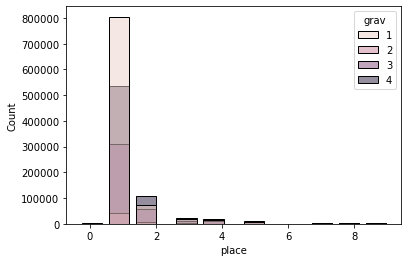

In [13]:
# mortality depending on the place in the car
sns.histplot(data = usagers[usagers['catu']!=3], x = 'place', hue = 'grav', shrink = 1.5)
#plt.xticks(locs = usagers['place'].unique())

<AxesSubplot:xlabel='place', ylabel='Count'>

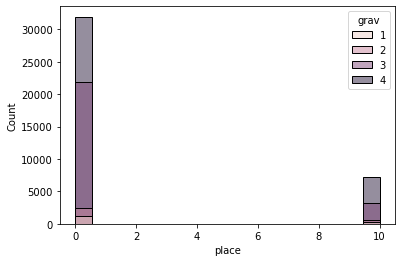

In [14]:
sns.histplot(data = usagers[usagers['catu']==3], x = 'place', hue = 'grav')


## caracteristiques table 

In [119]:
caracteristiques = pd.read_sql_query(f"SELECT Num_Acc, jour, mois, an, hrmn, lum, dep, agg, int, atm, col, lat, long FROM {names[0]} ", conn)
caracteristiques.head(2)
col_caracteristiques = ['Num_Acc', 'jour', 'mois', 'an', 'hrmn',
 'lum', 'dep', 'agg', 'int', 'atm', 'col','lat','long']
drop_caracteristiques = ['gps', 'adr', 'com']
drop_for_model = ['jour', 'mois', 'an', 'lat', 'long', 'dep']

### departement code correction 

For the years 2005-2018 departments are writen with number ending by zero
for the year 2019 the new coding is used 201 -> 2A, 202 -> 2B, 600 ->60 ect..
Changing all codes to format geo data (Code ISO 3166-1)

In [120]:
new_values = \
['01', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
 '02', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
 '2A', '2B', 
 '03', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 
 '04', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
 '05', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', 
 '06', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', 
 '07', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', 
 '08', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', 
 '09', '90', '91', '92', '93', '94', '95', 
 'QP', 'MQ', 'GF', 'RE', 'YT']
no_geo = ['975', '977','978', '986', '987', '988']
print(len(new_values))

101


In [121]:
old_values = \
['10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', 
 '20', '210', '220', '230', '240', '250', '260', '270', '280', '290', 
 '201', '202', 
 '30', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', 
 '40', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', 
 '50', '500', '510', '520', '530', '540', '550', '560', '570', '580', '590', 
 '60', '600', '610', '620', '630', '640', '650', '660', '670', '680', '690', 
 '70', '700', '710', '720', '730', '740', '750', '760', '770', '780', '790', 
 '80', '800', '810', '820', '830', '840', '850', '860', '870', '880', '890', 
 '90', '900', '910', '920', '930', '940', '950',
 '971', '972', '973', '974', '976']

print(len(old_values))

101


In [122]:
caracteristiques.dep = caracteristiques.dep.replace(old_values, new_values)

In [123]:
caracteristiques.dep.unique()

array(['93', '92', '94', '87', '69', '38', '34', '13', '988', 'YT', 'RE',
       'MQ', '2B', '91', '86', '83', '08', '78', '77', '76', '72', '71',
       '67', '66', '64', '06', '51', '05', '49', '45', '37', '35', '33',
       '31', '03', '29', '22', '19', '18', '17', '74', '81', '2', '59',
       '95', '63', '62', 'GF', '2A', '84', '9', '73', '43', '01', '36',
       '16', '7', '21', '04', '24', '4', '85', '27', '28', '52', '68',
       '42', '82', '11', '987', '44', '61', '14', '56', '58', '54', '47',
       '41', '3', '75', '1', '57', '32', '39', '15', '23', '6', '5', '26',
       '48', '986', 'QP', '89', '25', '12', '88', '65', '53', '07', '46',
       '09', '8', '79', '977', '55', '978', '975', '80', '02', '60', '50',
       '40', '10', '70', '30', '90'], dtype=object)

### year correction

Before 2019 all years are written as decimal number,
after 2019 - as full year

In [124]:
caracteristiques.loc[(caracteristiques.an < 1000),'an'] = caracteristiques.an + 2000
caracteristiques.tail(5)
print(len(caracteristiques))

1017309


In [125]:
caracteristiques.an= caracteristiques.an.astype('int')
caracteristiques.head(3)

,Num_Acc,jour,mois,an,hrmn,lum,dep,agg,int,atm,col,lat,long
0,201900000001,30,11,2019,01:30,4,93,1,1,1.0,2.0,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,1,1,1.0,6.0,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,1,1,1.0,4.0,"48,9358718","2,3191744"


### hrmn 
make correction after merging with other tables

In [126]:
df1 = caracteristiques[caracteristiques.an!=2019]
wrong_format = df1[[len(hr) < 3 for hr in df1.hrmn]]
print(len(wrong_format))
wrong_format[wrong_format['lum']==5]

# if lum ==1 or lum ==2 and len(hr)< 3 delete rows with accidents
# for the rest if len(hr)< 3 -> 00:mm

16436


,Num_Acc,jour,mois,an,hrmn,lum,dep,agg,int,atm,col,lat,long
58846,201800000007,26,9,2018,40,5,59,2,1,1.0,6.0,5052211.0,296652.0
58885,201800000046,28,10,2018,20,5,59,1,3,8.0,7.0,5063898.0,259912.0
58926,201800000087,9,7,2018,45,5,59,2,6,1.0,6.0,5000682.0,405801.0
59268,201800000429,10,5,2018,5,5,27,2,3,1.0,1.0,4894174.0,143510.0
59672,201800000833,7,7,2018,39,5,01,2,9,1.0,7.0,4617000.0,519800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017162,200500087808,7,12,2005,35,5,MQ,2,2,1.0,6.0,None,None
1017163,200500087809,8,12,2005,15,5,MQ,2,2,1.0,6.0,None,None
1017224,200500087870,10,12,2005,30,5,GF,2,3,1.0,2.0,None,None
1017249,200500087895,24,12,2005,50,5,GF,1,1,2.0,6.0,None,None


In [127]:
from datetime import datetime

# # if 3 and 4 numbers:
# caracteristiques.hrmn = [hm[:-2] + ':' + hm[-2:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]
# # if 2 number
# caracteristiques.hrmn = ['0'+ ':' + hm[-2:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]
# # if 1 number
# caracteristiques.hrmn = ['0'+ ':' + hm[-1:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]

In [128]:
## change format str to time object

# caracteristiques.hrmn = [datetime.strptime(hm, '%H:%M').time() if type(hm) != type(datetime.now().time()) else hm for hm in caracteristiques.hrmn ]
# print(caracteristiques.hrmn.unique())

In [129]:
datetime.now().time()

datetime.time(20, 36, 14, 806655)

### create column day of the week

In [130]:
from datetime import datetime
#example
year = 2021; month = 6; day = 20
date = datetime(year, month, day)
print(date.weekday())
caracteristiques['weekday'] = [datetime(an, mois, jour).weekday() for an,mois,jour in zip(caracteristiques.an, caracteristiques.mois, caracteristiques.jour)]
#caracteristiques.weekday

6


### lat and long format
5052211.0 till 2019 and after correct format   
for years = 2019:
1. replace ',' with '.'

2. change type to float
3. devide by 10000


In [131]:
caracteristiques['lat'] = caracteristiques['lat'].str.replace(',','.')
caracteristiques.lat = caracteristiques.lat.astype(float)
caracteristiques.loc[(caracteristiques.lat > 10000),'lat'] = caracteristiques.lat/100000
caracteristiques[caracteristiques.an!=2019]['lat']

58840      50.55737
58841      50.52936
58842      50.51243
58843      50.51974
58844      50.51607
             ...   
1017304         NaN
1017305         NaN
1017306         NaN
1017307         NaN
1017308         NaN
Name: lat, Length: 958469, dtype: float64

In [132]:
caracteristiques['lat'].sort_values()

25902     -61.425660
35539     -61.022100
48862     -27.059126
46106     -23.876829
11117     -23.116755
             ...    
1017304          NaN
1017305          NaN
1017306          NaN
1017307          NaN
1017308          NaN
Name: lat, Length: 1017309, dtype: float64

In [133]:
import numpy as np
caracteristiques['long'] = caracteristiques['long'].str.replace(',','.')
caracteristiques['long'] = [np.nan if l == '-' else l for l in caracteristiques['long']]
caracteristiques['long'] = caracteristiques['long'].astype(float)

In [134]:
caracteristiques.loc[(caracteristiques['an'] != 2019),'long'] = caracteristiques['long']/100000
caracteristiques[caracteristiques['an']!=2019]['long']

58840      2.94992
58841      2.93151
58842      2.91714
58843      2.89123
58844      2.90605
            ...   
1017304        NaN
1017305        NaN
1017306        NaN
1017307        NaN
1017308        NaN
Name: long, Length: 958469, dtype: float64

In [135]:
caracteristiques['long'].sort_values()

33123     -178.157355
3862      -178.155182
17610     -176.233145
42632     -176.172164
36984     -151.757378
              ...    
1017304           NaN
1017305           NaN
1017306           NaN
1017307           NaN
1017308           NaN
Name: long, Length: 1017309, dtype: float64

### import csv with clean table

In [136]:
import csv
caracteristiques.to_csv('caracteristique_2005_2019.csv', index= False)

In [137]:
pd.read_csv('caracteristique_2005_2019.csv', low_memory=True)

/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Num_Acc,jour,mois,an,hrmn,lum,dep,agg,int,atm,col,lat,long,weekday
0,201900000001,30,11,2019,01:30,4,93,1,1,1.0,2.0,48.896210,2.470120,5
1,201900000002,30,11,2019,02:50,3,93,1,1,1.0,6.0,48.930700,2.368800,5
2,201900000003,28,11,2019,15:15,1,92,1,1,1.0,4.0,48.935872,2.319174,3
3,201900000004,30,11,2019,20:20,5,94,1,1,1.0,4.0,48.817329,2.428150,5
4,201900000005,30,11,2019,04:00,3,94,1,1,1.0,2.0,48.776362,2.433254,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017304,200500087950,21,12,2005,2035,5,RE,2,2,1.0,3.0,NaN,NaN,2
1017305,200500087951,23,12,2005,1010,1,RE,2,1,1.0,3.0,NaN,NaN,4
1017306,200500087952,26,12,2005,1715,1,RE,2,2,1.0,3.0,NaN,NaN,0
1017307,200500087953,27,12,2005,1500,1,RE,2,3,2.0,5.0,NaN,NaN,1


## lieux table

In [10]:
lieux = pd.read_sql_query(f"SELECT * FROM {names[1]} Limit 1000", conn)
lieux

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,201900000001,1,3.0,0.0,None,3.0,10.0,6.0,900.0,0.0,1.0,2.0,NaN,NaN,1.0,2.0,1.0,None,70
1,201900000002,1,1.0,0.0,None,1.0,2.0,3.0,845.0,0.0,4.0,2.0,NaN,NaN,1.0,0.0,1.0,None,70
2,201900000003,1,86.0,0.0,None,3.0,8.0,10.0,500.0,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,None,90
3,201900000004,1,4.0,0.0,None,3.0,5.0,2.0,299.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,None,90
4,201900000005,1,86.0,0.0,INT,1.0,3.0,41.0,0.0,0.0,1.0,3.0,NaN,NaN,1.0,2.0,1.0,None,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,201900000996,2,10.0,NaN,None,2.0,2.0,(1),(1),0.0,2.0,3.0,NaN,NaN,1.0,0.0,3.0,None,80
996,201900000997,3,8.0,NaN,None,2.0,2.0,8.0,200.0,0.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,None,90
997,201900000998,7,102.0,0.0,None,2.0,2.0,(1),(1),0.0,1.0,1.0,NaN,NaN,1.0,0.0,8.0,None,50
998,201900000999,3,4096.0,0.0,None,2.0,2.0,24.0,0.0,0.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,None,80


<AxesSubplot:xlabel='catr', ylabel='vma'>

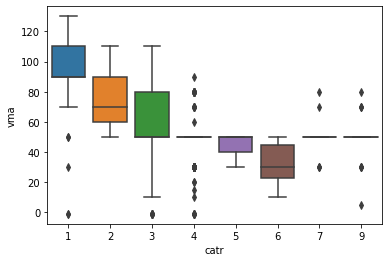

In [13]:
sns.boxplot(data = lieux, x = 'catr', y = 'vma')

##  Map of accidents


In [69]:
# create data for map
coord = pd.read_sql_query(f"SELECT Num_Acc, an, dep FROM {names[0]} ", conn)
people = pd.read_sql_query(f"SELECT Num_Acc, catu, grav FROM {names[3]}", conn)

In [70]:
coord.head()

,Num_Acc,an,dep
0,201900000001,2019,93
1,201900000002,2019,93
2,201900000003,2019,92
3,201900000004,2019,94
4,201900000005,2019,94


In [71]:
coord.isnull().sum()

Num_Acc    0
an         0
dep        0
dtype: int64

In [72]:
people.head()

,Num_Acc,catu,grav
0,201900000001,2,4
1,201900000001,1,4
2,201900000001,1,1
3,201900000002,1,4
4,201900000003,1,1


In [73]:
data_map = people.join(coord.set_index('Num_Acc'), on = 'Num_Acc')

In [74]:
data_map.dropna(axis = 0, inplace = True)

In [75]:
data_map[data_map.an == 2017].dep.unique()

array([], dtype=object)

In [37]:
# plot
import folium
from folium.features import DivIcon
import requests
import json

lat = 46.9276; lon = 2.2137
v = folium.Map(location=[lat, lon], zoom_start=6)
# for 
#     v = folium.Map(location=[lat, lon], zoom_start=13)
#     icon = folium.features.CustomIcon(weather_icon,icon_size=(100, 100))  # Creating a custom Icon
#     folium.Marker(location=[lat+0.002, lon+0.002],icon=icon).add_to(v)  #adding it to the map
#     folium.Marker(location=[lat+0.002, lon+0.002],icon=DivIcon(
#             icon_size=(100, 100),
#             icon_anchor=(10, 12),
#             html= '<div style="font-size: 14pt; color:black;font-family:verdana;">%s</div>'   % text,
#         )).add_to(v)

#     display(v)
# except:
#     print("Not valid name of the city")
display(v)